In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

# Deutsch Algorithm

**Problem**: Consider an oracle evaluating a 1 bit boolean function $f: \{ 0,1\} \rightarrow \{ 0,1\}$ we want to know if the function is constant ( $f(0) = 0$ and $f(1) = 1$) or balanced ( $f(0) = 1$ and $f(1) = 0$). 

For a classical computer it is needed two queries, that means, you need to test 2 diferent bits and see the outputs, for instance if $f(0) = 0$ and $f(1) = 1$ you know that the function is constant.

For a quantum computer this can be done with only one query. This is done with the Deutsch algorithm, the idea is to check if it is balanced, if it is not balanced it is constant.

**Solution**: The Deutsch's Algorithm is the following:

Start with the state $\left| \psi \right> = \left| 10 \right>$:

1) Apply a Hadamard on both qubits, the state will be: $\left| \psi_2 \right> =$ $\frac{1}{2} \left( \left| 0 \right> - \left| 1 \right> \right) \otimes \left( \left| 0 \right> + \left| 1 \right> \right) $

2) Apply a Unitary operator such that:  $U_f  \frac{1}{\sqrt 2} \left( \left| 0 \right> - \left| 1 \right> \right)\left| x \right> $ $ = (-1)^{f(x)} \frac{1}{\sqrt 2} \left( \left| 0 \right> - \left| 1 \right> \right)\left| x \right>$. The phase factor is "kicked back" on the front of the state, this will be useful to evaluate $f(x)$ with only one query. The state after $U_f$ is: $\left| \psi_3 \right> =$ $\frac{1}{2} \left( \left| 0 \right> - \left| 1 \right> \right) \otimes \left( (-1)^{f(0)}\left| 0 \right> + (-1)^{f(1)}\left| 1 \right> \right) $

3) Apply a Hadamard on the first Qubit: $\left| \psi_3 \right> =$ $\frac{1}{2} \left( \left| 0 \right> - \left| 1 \right> \right) \otimes \left[ \left((-1)^{f(0)} + (-1)^{f(1)}\right) \left| 0 \right> + \left((-1)^{f(0)} - (-1)^{f(1)}\right)\left| 1 \right> \right] $

So now if $f(0) = f(1)$ we will measure $\left| 0 \right> = \left| f(0) \bigoplus f(1) \right>$ and if $f(0) \neq f(1)$ we will measure $\left| 1 \right> = \left| f(0) \bigoplus f(1) \right>$.

In this implementation the oracle ($U_f$) is a C-NOT gate, this will measure if the function is balanced.

This can be extended for a function with more inputs, not only two. In this case, the solution is the Deutsch–Jozsa Algorithm.

In [2]:
%matplotlib inline
import qiskit as Qsk
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Q_Circuit = Qsk.QuantumCircuit(2)

We start with the state $\left| \psi_0 \right>$ $= \left| 00 \right>$ 

In [4]:
Q_Circuit.x(1);

Now the state is $\left| \psi_1 \right>$ $= \left| 10 \right>$

In [5]:
Q_Circuit.h(0);
Q_Circuit.h(1);

Since the Haddamard gate is given by the following matrix on the computational basis:

\begin{equation}
H = \frac{1}{\sqrt2}
 \begin{pmatrix} 
1 & 1\\
1 & -1 \\
\end{pmatrix}
\end{equation}

Now the state is $\left| \psi_2 \right> =$ $\frac{1}{2} \left( \left| 0 \right> - \left| 1 \right> \right) \otimes \left( \left| 0 \right> + \left| 1 \right> \right) $

In [6]:
Q_Circuit.cx(0,1);

$\left| \psi_3 \right> =$ $ \frac{1}{2} \left[ 
\left| 0 \right> \otimes \left( \left| 0 \bigoplus 0 \right> + \left| 1 \bigoplus 0 \right> \right) 
- \left| 1 \right> \otimes \left( \left| 0 \bigoplus 1 \right> + \left| 1 \bigoplus 1 \right> \right)
\right]$

$\left| \psi_3 \right> = $ $ \frac{1}{2} \left[ 
\left| 0 \right> \otimes \left( \left| 0 \right> + \left| 1  \right> \right) 
- \left| 1 \right> \otimes \left( \left|  1 \right> + \left| 0 \right> \right)
\right]$

In [7]:
Q_Circuit.h(0);

After the Hadamard on the first qubit, we have that

$\left| \psi_4 \right> = $ $ \frac{1}{2} \left[ 
\left( \left| 0 \right> + \left| 1 \right> \right) \otimes \left( \left| 0 \right> + \left| 1  \right> \right) 
- \left( \left| 0 \right> - \left| 1 \right> \right) \otimes \left( \left|  1 \right> + \left| 0 \right> \right)
\right]$

$\left| \psi_4 \right> = $ $ \frac{1}{\sqrt2} 
\left( 
\left| 0 \right> - \left| 1 \right>
\right) \otimes
\left| 1 \right>
$

## Building a measurement circuit and making experiments

## First Experiment: Simulating the circuit on the computer

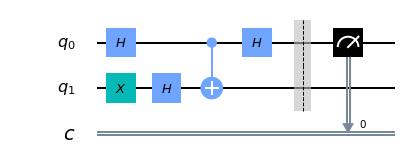

In [8]:
circ_meas = Qsk.QuantumCircuit(2, 1)
circ_meas.barrier(range(2))
circ_meas.measure(qubit=0,cbit=0)
final_circ = Q_Circuit + circ_meas
final_circ.draw(output='mpl')

In [9]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)
print(counts)

{'1': 1024}


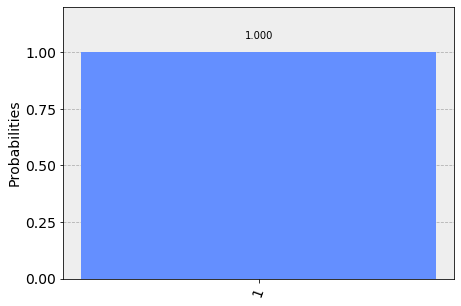

In [10]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Second Experiment: Running the circuit on the IBM Q

In [11]:
from qiskit import IBMQ

IBMQ.load_account();
provider = IBMQ.get_provider(group='open')

In [12]:
from Q_Functions import Print_status

Print_status()

 NAME : ibmq_qasm_simulator
 STATUS:
    backend_name    = ibmq_qasm_simulator
    backend_version = 0.0.0
    status_msg      = active
    pending_jobs    = 0
    operational     = True
 NAME : ibmqx2
 STATUS:
    backend_name    = ibmqx2
    backend_version = 2.0.0
    status_msg      = active
    pending_jobs    = 187
    operational     = True
 NAME : ibmq_16_melbourne
 STATUS:
    backend_name    = ibmq_16_melbourne
    backend_version = 1.0.0
    status_msg      = active
    pending_jobs    = 11
    operational     = True
 NAME : ibmq_vigo
 STATUS:
    backend_name    = ibmq_vigo
    backend_version = 1.0.1
    status_msg      = active
    pending_jobs    = 2
    operational     = True
 NAME : ibmq_ourense
 STATUS:
    backend_name    = ibmq_ourense
    backend_version = 1.0.1
    status_msg      = active
    pending_jobs    = 1
    operational     = True


Choosing the least busy backend

In [13]:
backend = provider.get_backend('ibmq_ourense')

Submiting the job for the IBM Q platform

In [14]:
from qiskit.tools.monitor import job_monitor

job_exp = Qsk.execute(final_circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [15]:
result_exp = job_exp.result()

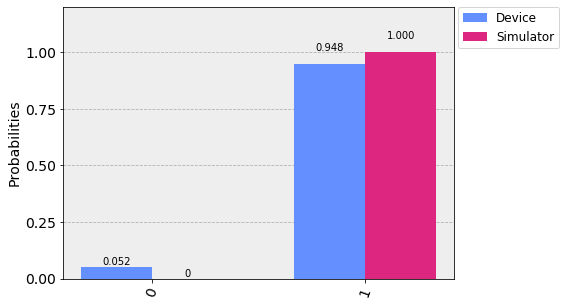

In [16]:
from qiskit.visualization import plot_histogram
counts_exp = result_exp.get_counts(final_circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

Printing the Job ID

In [17]:
job_id = job_exp.job_id()

print('JOB ID: {}'.format(job_id))

JOB ID: 5dadf6e49557e20018cc419f


This shows that the error of this algorithm on a real computer is $0.052$ .